# Explication du probléme

# Présentation de la solution proposée

# Extraction des données

In [1]:
import pandas as pd                        
from pytrends.request import TrendReq
from pytrends import dailydata

In [2]:
pytrend = TrendReq()

In [3]:
pytrend.build_payload(kw_list=['Netflix'])
# Interest by Region
dfre = pytrend.interest_by_region()
dfre

,Netflix
geoName,
Afghanistan,0
Albania,0
Algeria,21
American Samoa,0
Andorra,0
...,...
Western Sahara,0
Yemen,0
Zambia,0


In [4]:
#drop zero
dfre =dfre.loc[(dfre!=0).any(axis=1)]
dfre

,Netflix
geoName,
Algeria,21
Argentina,100
Australia,73
Austria,47
Belgium,65
...,...
United Kingdom,65
United States,65
Uruguay,100


<AxesSubplot:xlabel='geoName'>

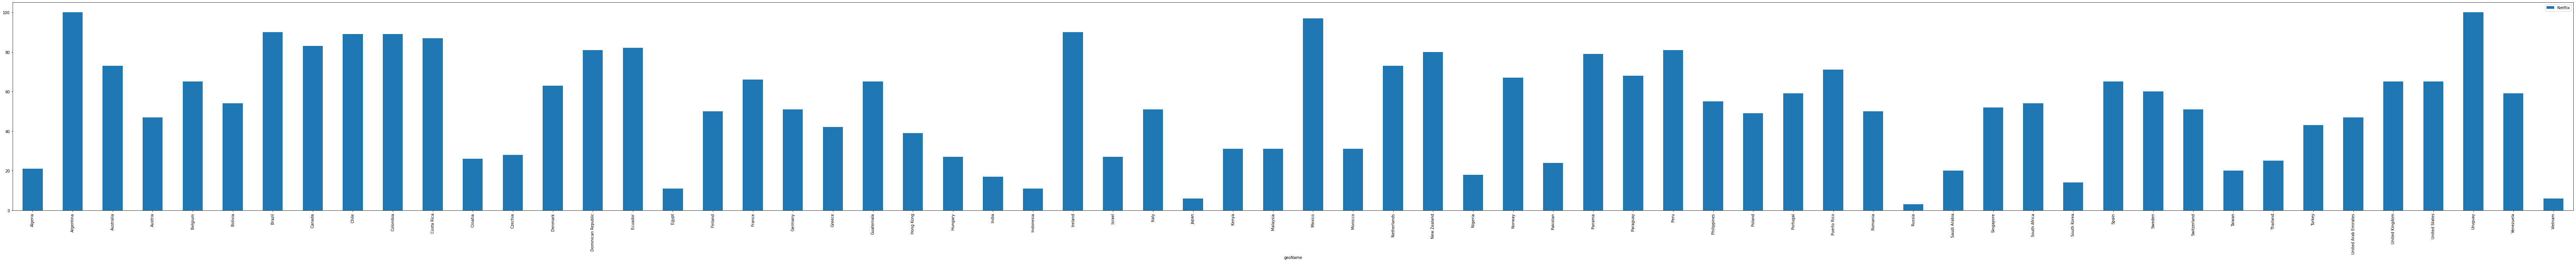

In [5]:
dfre.reset_index().plot(x='geoName', y='Netflix', figsize=(120, 10), kind ='bar')

In [6]:
#popularity over 70
dfre =dfre.loc[(dfre>=70).any(axis=1)]
dfre

,Netflix
geoName,
Argentina,100
Australia,73
Brazil,90
Canada,83
Chile,89
Colombia,89
Costa Rica,87
Dominican Republic,81
Ecuador,82


<AxesSubplot:xlabel='geoName'>

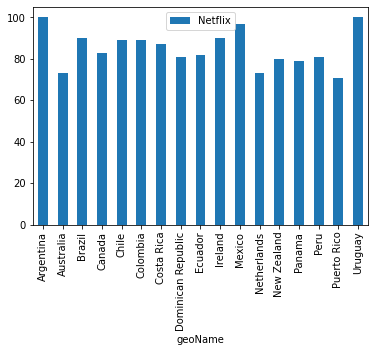

In [7]:
dfre.reset_index().plot(x='geoName', y='Netflix',  kind ='bar')

# Interpretation

In [8]:
# les termes recherchés avec le keyword "netflix" sur google
#related_queries = pytrend.related_queries()
#related_queries.values()
related_queries_dict = pytrend.related_queries()
related_queries_dict

{'Netflix': {'top':                      query  value
  0           netflix movies    100
  1           series netflix     76
  2        movies on netflix     54
  3             film netflix     42
  4            serie netflix     41
  5          best on netflix     36
  6            netflix shows     30
  7        peliculas netflix     25
  8      best netflix movies     25
  9              you netflix     24
  10           netflix filme     23
  11          netflix filmes     20
  12            free netflix     19
  13           netflix login     17
  14  best movies on netflix     17
  15        download netflix     16
  16          new on netflix     16
  17              netflix uk     16
  18    peliculas de netflix     13
  19          netflix canada     12
  20                    hulu     12
  21          netflix gratis     12
  22             netflix app     12
  23    peliculas en netflix     11
  24     netflix best series     11,
  'rising':                            query 

In [9]:
df = related_queries_dict['Netflix']['top']
df = df.iloc[:,0:1]
df

,query
0,netflix movies
1,series netflix
2,movies on netflix
3,film netflix
4,serie netflix
5,best on netflix
6,netflix shows
7,peliculas netflix
8,best netflix movies
9,you netflix


In [10]:
df2 = related_queries_dict['Netflix']['rising']
df2 = df2.iloc[:,0:1]
df2

,query
0,bird box netflix
1,disney plus
2,netflix filmleri
3,netflix dizileri
4,netflix movies 2017
5,lupin netflix
6,outer banks netflix
7,netflix filmy
8,unbelievable netflix
9,netflix mod apk


In [11]:
#df = df+df2
#df.to_csv('terms1.csv', sep=';')

In [12]:
df = pd.read_csv(r"C:\Users\kille\terms1.csv", sep = ';', header=None)

In [13]:
df[1]

0               netflix movies
1               series netflix
2                netflix movie
3            movies on netflix
4                serie netflix
5                 netflix film
6              best on netflix
7                netflix shows
8                  you netflix
9          best netflix movies
10           netflix peliculas
11               netflix filme
12              filmes netflix
13               netflix login
14                free netflix
15            netflix download
16            download netflix
17      best movies on netflix
18                 top netflix
19                  netflix uk
20              new on netflix
21        peliculas de netflix
22               netflix films
23              netflix canada
24                        hulu
25            bird box netflix
26                 disney plus
27            netflix filmleri
28            netflix dizileri
29              netflix cuties
30               lupin netflix
31          insatiable netflix
32      

In [14]:
text = """"""
for i in df[1]:
    text+=i
text

' netflix movies series netflix netflix movie movies on netflix serie netflix netflix film best on netflix netflix shows you netflix best netflix movies netflix peliculas netflix filme filmes netflix netflix login free netflix netflix download download netflix best movies on netflix top netflix netflix uk new on netflix peliculas de netflix netflix films netflix canada hulu bird box netflix disney plus netflix filmleri netflix dizileri netflix cuties lupin netflix insatiable netflix ratched netflix shadow and bone netflix the witcher netflix netflix films witcher netflix netflix üyelik the witcher netflix mod apk lost in space netflix cuties on netflix after we collided netflix sabrina seriale netflix en iyi netflix dizileri hot videos netflix clickbait netflix bodyguard netflix netflix giriş netflix drama netflix witcher netflix action netflix the witcher netflix series 2021'

In [15]:
import numpy as np
import nltk
import os
import nltk.corpus
import nltk.data

In [16]:
text = text.lower()

In [17]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

In [18]:
for ele in text:
    if ele in punc:
        text = text.replace(ele, "")

In [19]:
#nltk.download('stopwords') once !
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'again', 'to', 'some', 'those', 'out', 'nor', 'of', 's', 'by', 'into', 'd', 'which', 'here', "hasn't", 'me', 'yourselves', 'he', 'and', 'same', 'after', 'a', "should've", 'such', "wasn't", 'during', 'their', 'aren', 'as', "couldn't", 'very', 'should', 'off', 'why', "didn't", 'myself', "you'd", 'these', 'before', 'weren', "you've", 'do', 've', 'wouldn', 'that', 'does', "it's", 'how', 'his', "hadn't", "isn't", 'but', "don't", 'theirs', 'didn', "mightn't", 'down', 'no', 'there', 'few', 'an', 'we', 'what', 'won', 'them', 'been', 'through', 'haven', 'ourselves', 'up', 'himself', 'where', "that'll", 'yourself', "needn't", 'or', 'on', 'mustn', 'it', 'all', 'each', 'themselves', "wouldn't", 'she', 'not', 'your', 'below', 'hadn', "won't", 're', 'doesn', "she's", 'from', 'more', "mustn't", 'with', 'between', 'when', 'was', 'having', 'were', "you're", 'its', 'don', 'too', 'if', 'ma', "you'll", 'ain', 'than', 'then', 'under', 'so', 'the', 'own', "shouldn't", "aren't", 'isn', 'any', 'ours', 'hers'

In [20]:
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

In [21]:
token = word_tokenize(text)
token

['netflix',
 'movies',
 'series',
 'netflix',
 'netflix',
 'movie',
 'movies',
 'on',
 'netflix',
 'serie',
 'netflix',
 'netflix',
 'film',
 'best',
 'on',
 'netflix',
 'netflix',
 'shows',
 'you',
 'netflix',
 'best',
 'netflix',
 'movies',
 'netflix',
 'peliculas',
 'netflix',
 'filme',
 'filmes',
 'netflix',
 'netflix',
 'login',
 'free',
 'netflix',
 'netflix',
 'download',
 'download',
 'netflix',
 'best',
 'movies',
 'on',
 'netflix',
 'top',
 'netflix',
 'netflix',
 'uk',
 'new',
 'on',
 'netflix',
 'peliculas',
 'de',
 'netflix',
 'netflix',
 'films',
 'netflix',
 'canada',
 'hulu',
 'bird',
 'box',
 'netflix',
 'disney',
 'plus',
 'netflix',
 'filmleri',
 'netflix',
 'dizileri',
 'netflix',
 'cuties',
 'lupin',
 'netflix',
 'insatiable',
 'netflix',
 'ratched',
 'netflix',
 'shadow',
 'and',
 'bone',
 'netflix',
 'the',
 'witcher',
 'netflix',
 'netflix',
 'films',
 'witcher',
 'netflix',
 'netflix',
 'üyelik',
 'the',
 'witcher',
 'netflix',
 'mod',
 'apk',
 'lost',
 'in',
 

In [22]:
filtered_sentence = [w for w in token if not w.lower() in stop_words]
 
filtered_sentence = []
for w in token:
    if w not in stop_words:
        filtered_sentence.append(w)

In [23]:
from nltk.probability import FreqDist
fdist = FreqDist(filtered_sentence)
print(fdist)

<FreqDist with 52 samples and 117 outcomes>


In [24]:
count=len(fdist)
count

52

In [25]:
fdist.most_common(10)

[('netflix', 51),
 ('witcher', 5),
 ('movies', 4),
 ('best', 3),
 ('series', 2),
 ('peliculas', 2),
 ('download', 2),
 ('films', 2),
 ('dizileri', 2),
 ('cuties', 2)]

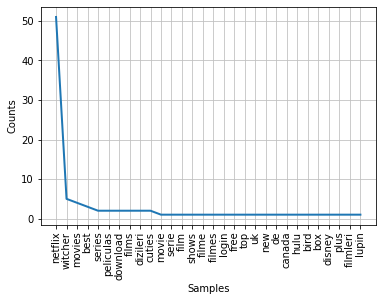

In [26]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [27]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sentence:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sentence)

Filtered Sentence: ['netflix', 'movies', 'series', 'netflix', 'netflix', 'movie', 'movies', 'netflix', 'serie', 'netflix', 'netflix', 'film', 'best', 'netflix', 'netflix', 'shows', 'netflix', 'best', 'netflix', 'movies', 'netflix', 'peliculas', 'netflix', 'filme', 'filmes', 'netflix', 'netflix', 'login', 'free', 'netflix', 'netflix', 'download', 'download', 'netflix', 'best', 'movies', 'netflix', 'top', 'netflix', 'netflix', 'uk', 'new', 'netflix', 'peliculas', 'de', 'netflix', 'netflix', 'films', 'netflix', 'canada', 'hulu', 'bird', 'box', 'netflix', 'disney', 'plus', 'netflix', 'filmleri', 'netflix', 'dizileri', 'netflix', 'cuties', 'lupin', 'netflix', 'insatiable', 'netflix', 'ratched', 'netflix', 'shadow', 'bone', 'netflix', 'witcher', 'netflix', 'netflix', 'films', 'witcher', 'netflix', 'netflix', 'üyelik', 'witcher', 'netflix', 'mod', 'apk', 'lost', 'space', 'netflix', 'cuties', 'netflix', 'collided', 'netflix', 'sabrina', 'seriale', 'netflix', 'en', 'iyi', 'netflix', 'dizileri',

In [28]:
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

lemmed_words=[]
for w in stemmed_words:
    lemmed_words.append(lem.lemmatize(w))
print("Stemmed Word:",stemmed_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kille\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Stemmed Word: ['netflix', 'movi', 'seri', 'netflix', 'netflix', 'movi', 'movi', 'netflix', 'seri', 'netflix', 'netflix', 'film', 'best', 'netflix', 'netflix', 'show', 'netflix', 'best', 'netflix', 'movi', 'netflix', 'pelicula', 'netflix', 'film', 'film', 'netflix', 'netflix', 'login', 'free', 'netflix', 'netflix', 'download', 'download', 'netflix', 'best', 'movi', 'netflix', 'top', 'netflix', 'netflix', 'uk', 'new', 'netflix', 'pelicula', 'de', 'netflix', 'netflix', 'film', 'netflix', 'canada', 'hulu', 'bird', 'box', 'netflix', 'disney', 'plu', 'netflix', 'filmleri', 'netflix', 'dizileri', 'netflix', 'cuti', 'lupin', 'netflix', 'insati', 'netflix', 'ratch', 'netflix', 'shadow', 'bone', 'netflix', 'witcher', 'netflix', 'netflix', 'film', 'witcher', 'netflix', 'netflix', 'üyelik', 'witcher', 'netflix', 'mod', 'apk', 'lost', 'space', 'netflix', 'cuti', 'netflix', 'collid', 'netflix', 'sabrina', 'serial', 'netflix', 'en', 'iyi', 'netflix', 'dizileri', 'hot', 'video', 'netflix', 'clickbait'

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [30]:
vect=TfidfVectorizer(stop_words='english', analyzer='word')
tfidf_mat=vect.fit_transform(lemmed_words)

In [31]:
feature_names=vect.get_feature_names() #to get the names of the tokens 
dense= tfidf_mat.todense() # to convert sparse matrix to numpy array 
denselist = dense.tolist() #convert array to list 
df2=pd.DataFrame(denselist, columns=feature_names)

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [34]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

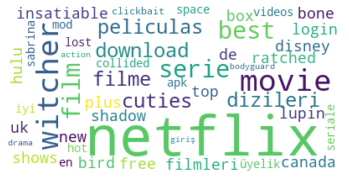

In [35]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Interpretation du BOW

# Data mining

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["netflix movies.",
"series netflix.",
"netflix movie.",
"movies on netflix.",
"serie netflix.",
"netflix film.",
"best on netflix.",
"netflix shows.",
"you netflix.",
"best netflix movies.",
"netflix peliculas.",
"netflix filme.",
"filmes netflix.",
"netflix login.",
"free netflix.",
"netflix download.",
"download netflix.",
"best movies on netflix.",
"top netflix.",
"netflix uk.",
"new on netflix.",
"peliculas de netflix.",
"netflix films.",
"netflix canada.",
"hulu.",
"bird box netflix.",
"disney plus.",
"netflix filmleri.",
"netflix dizileri.",
"netflix cuties.",
"lupin netflix.",
"insatiable netflix.",
"ratched netflix.",
"shadow and bone netflix.",
"the witcher netflix.",
"netflix films.",
"witcher netflix.",
"netflix series.",
"the witcher.",
"netflix mod apk.",
"lost in space netflix.",
"cuties on netflix.",
"after we collided.",
"netflix sabrina.",
"seriale netflix.",
"en iyi netflix dizileri.",
"hot videos netflix.",
"clickbait netflix.",
"bodyguard netflix.",
"netflix giriş.",
"netflix drama.",
"netflix witcher.",
"netflix action.",
"netflix the witcher.",
"netflix series 2021."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 hulu
 collided
 new
 disney
 plus
 netflix
 filmes
 filme
 film
 en
Cluster 1:
 netflix
 witcher
 movies
 series
 best
 cuties
 films
 peliculas
 download
 dizileri


Prediction
[1]
[1]


# Interpretation des resultats
